Using your store items data:

Convert date column to datetime format.

Plot the distribution of sale_amount and item_price.

Set the index to be the datetime variable.

Add a 'month' and 'day of week' column to your dataframe.

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.`

In [1]:
import pandas as pd
import os
import requests
import acquire 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('df_complete.csv')

In [3]:
df.head()

,Unnamed: 0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_date,sale_id,store,store_address_x,store_city_x,store_state_x,store_zipcode_x,store_address_y,store_city_y,store_state_y,store_zipcode_y
0,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       913000 non-null  int64  
 1   item_brand       913000 non-null  object 
 2   item_id          913000 non-null  int64  
 3   item_name        913000 non-null  object 
 4   item_price       913000 non-null  float64
 5   item_upc12       913000 non-null  int64  
 6   item_upc14       913000 non-null  int64  
 7   sale_amount      913000 non-null  float64
 8   sale_date        913000 non-null  object 
 9   sale_id          913000 non-null  int64  
 10  store            913000 non-null  int64  
 11  store_address_x  913000 non-null  object 
 12  store_city_x     913000 non-null  object 
 13  store_state_x    913000 non-null  object 
 14  store_zipcode_x  913000 non-null  int64  
 15  store_address_y  913000 non-null  object 
 16  store_city_y     913000 non-null  obje

In [5]:
#Turn sale date data type into date time
df.sale_date = pd.to_datetime(df.sale_date)

In [6]:
df.dtypes

Unnamed: 0                       int64
item_brand                      object
item_id                          int64
item_name                       object
item_price                     float64
item_upc12                       int64
item_upc14                       int64
sale_amount                    float64
sale_date          datetime64[ns, UTC]
sale_id                          int64
store                            int64
store_address_x                 object
store_city_x                    object
store_state_x                   object
store_zipcode_x                  int64
store_address_y                 object
store_city_y                    object
store_state_y                   object
store_zipcode_y                  int64
dtype: object

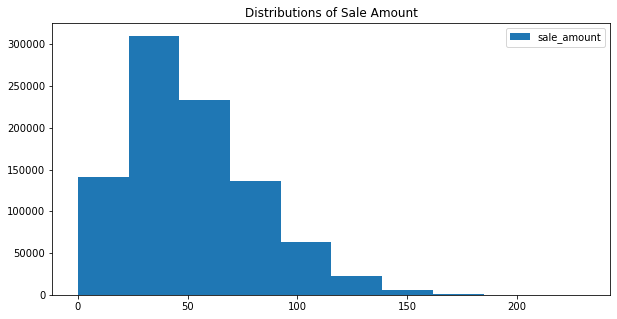

In [7]:
#distributuon of sale amount, and item price
plt.figure(figsize=(10,5))
df.sale_amount.hist(label='sale_amount')
plt.legend()
plt.title('Distributions of Sale Amount')
plt.grid()
plt.show()

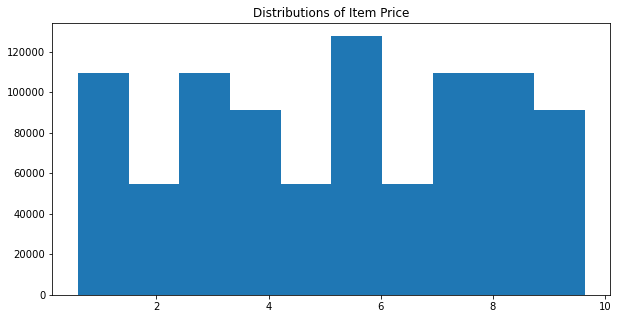

In [8]:
plt.figure(figsize=(10,5))
df.item_price.hist(label='item_price')
plt.title('Distributions of Item Price')
plt.grid()
plt.show()

In [9]:
#Set sale_date as an index
df = df.set_index('sale_date')

In [10]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()

In [11]:
df['sales_total'] = df.sale_amount * df.item_price

In [12]:
def date_to_index (df, col_date):
    '''
    takes in a df and a name of the column that is a date. 
    return a df with the selected column in datetime format  as Index 
    '''
    #convert sale_date to datetime format
    df[col_date]= pd.to_datetime(df[col_date])
    #set date as index
    df = df.set_index(col_date).sort_index()
    return df

In [13]:
def prep_sales (df, col_date):
    '''
    takes in a df and the name of the column (date),
    return df  with the selected column in datetime format  as Index, new columns:
    month, day of week and sales_total
    '''
    
    #set date to index
    df = date_to_index (df, col_date)
    
    #create new columns
    df['month '] = df.index.month
    df['day_of_week' ] = df.index.day_name()
    df['sales_total'] = df.sale_amount * df.item_price
    #drop a column
    df = df.drop(columns ='Unnamed: 0')

    return df

In [14]:
def distribution (df):
    '''
    takes in a df and plot individual variable distributions excluding object type
    '''
    cols =df.columns.to_list()
    for col in cols:
        if df[col].dtype != 'object':
            plt.hist(df[col])
            plt.title(f'Distribution of {col}')
            plt.xlabel('values')
            plt.ylabel('Counts ')
            plt.show()


In [15]:
import prepare as p

Convert date column to datetime format.

Plot the distribution of each of your variables.

Set the index to be the datetime variable.

Add a month and a year column to your dataframe.

Fill any missing values.

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the 
functions and get the same results.

In [16]:
germany_df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')  

In [17]:
germany_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [18]:
germany_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [19]:
germany_df['Date'] = pd.to_datetime(germany_df.Date)

In [20]:
germany_df.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [21]:
#Set sale_date as an index
germany_df = germany_df.set_index('Date')

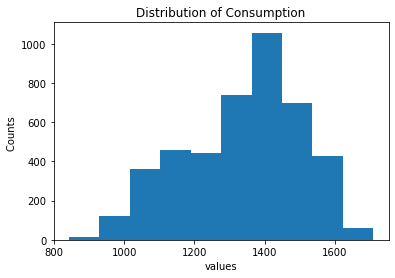

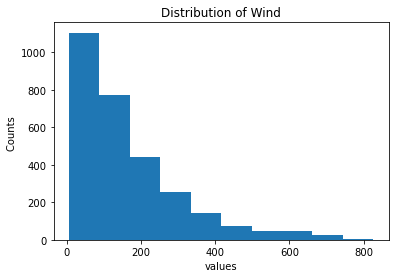

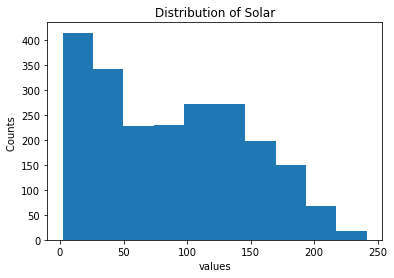

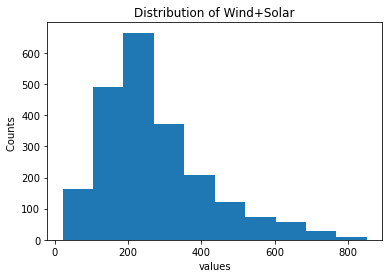

In [22]:
distribution(germany_df)

In [23]:
germany_df['month'] = germany_df.index.month
germany_df['day_of_week'] = germany_df.index.day_name()

In [24]:
germany_df

,Consumption,Wind,Solar,Wind+Solar,month,day_of_week
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,1,Thursday
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,12,Friday
